# < Spotify Music Data >

## 음악 데이터의 특성들을 활용하여 딥러닝을 통해 장르를 예측
## 특정 음악을 입력받아 그와 유사한 음악을 추천하는 시스템

데이터 분석
1. popularity에 따른 장르 분포
2. danceability에 따른 popularity 분포  
(가설 : danceability가 높을수록 popularity가 높을 것이다)
3. 특성들 간의 관계성  





In [ ]:
from __future__ import print_function

In [ ]:
import pandas as pd
df= pd.read_csv("/content/SpotifyFeatures.csv")
df = df.drop("track_id", axis = 1)
df

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
pd.DataFrame(df.isnull().sum(), columns=['결측치'])

,결측치
genre,0
artist_name,0
track_name,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0


In [ ]:
# 곡 제목 중복 값
print("중복되는 곡 제목 수", df['track_name'].duplicated().sum())

중복되는 곡 제목 수 84110


In [ ]:
df = df.drop_duplicates(['track_name'])
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148610,Soul,H-Town,They Like It Slow,39,0.1130,0.611,279510,0.493,0.000000,C#,0.1050,-9.297,Major,0.0354,115.920,4/4,0.443
148611,Soul,John Legend,Quickly (feat. Brandy),39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
148612,Soul,Belly,P.O.P.,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
148613,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


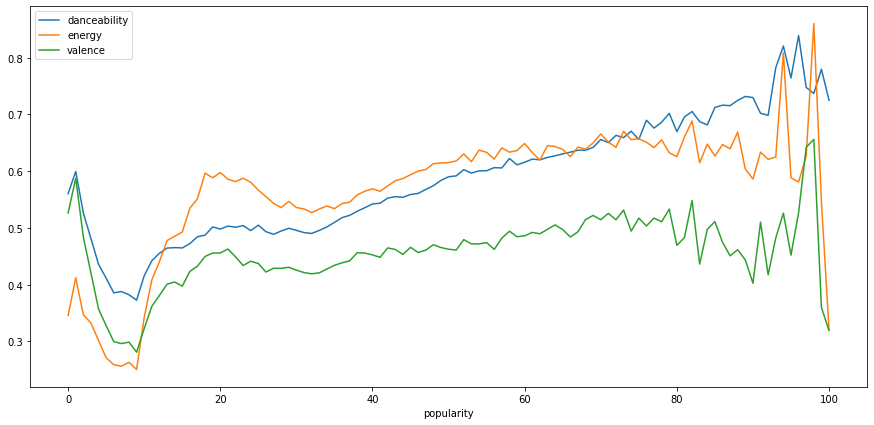

In [ ]:
df.groupby('popularity')['danceability', 'energy', 'valence'].mean().plot(figsize=(15, 7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


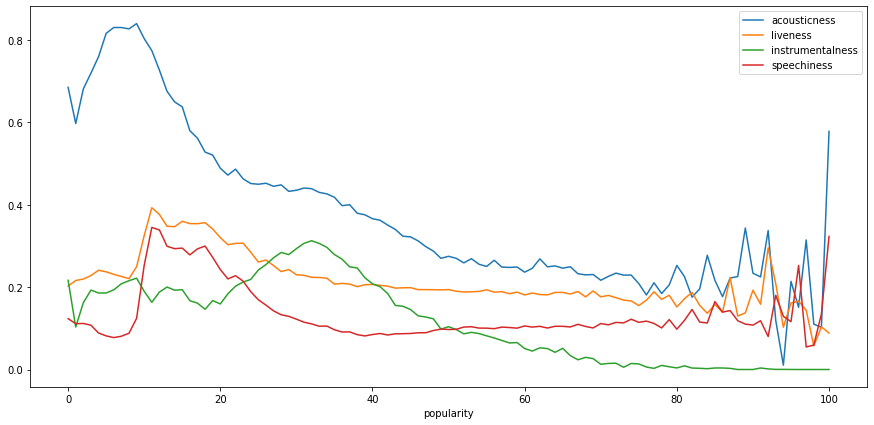

In [ ]:
df.groupby('popularity')['acousticness', 'liveness', 'instrumentalness', 'speechiness'].mean().plot(figsize=(15, 7))

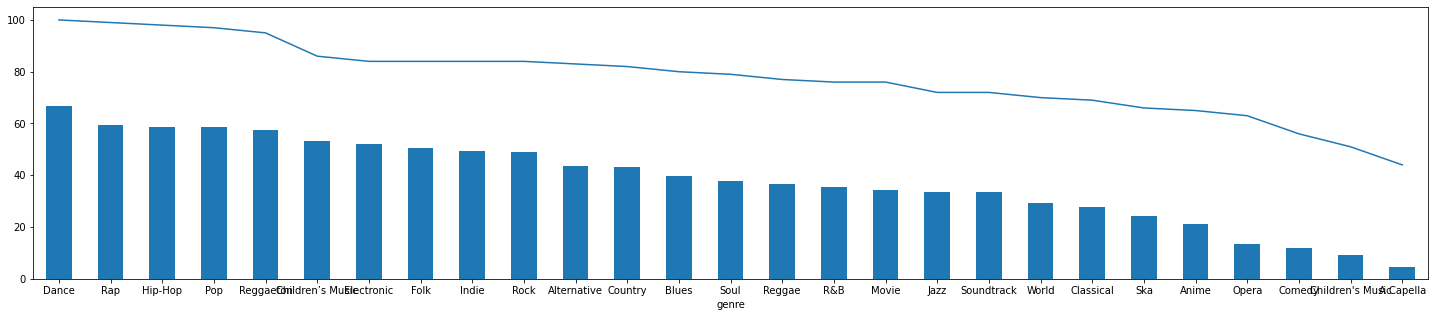

In [ ]:
# 장르에 따른 popularity의 평균
df.groupby('genre')['popularity'].mean().sort_values(ascending=False).plot(kind='bar', figsize = (25, 5))
df.groupby('genre')['popularity'].max().sort_values(ascending=False).plot(figsize = (25, 5))

In [ ]:
# 장르의 개수
print("장르의 개수 :", len(df['genre'].unique()))

장르의 개수 : 27


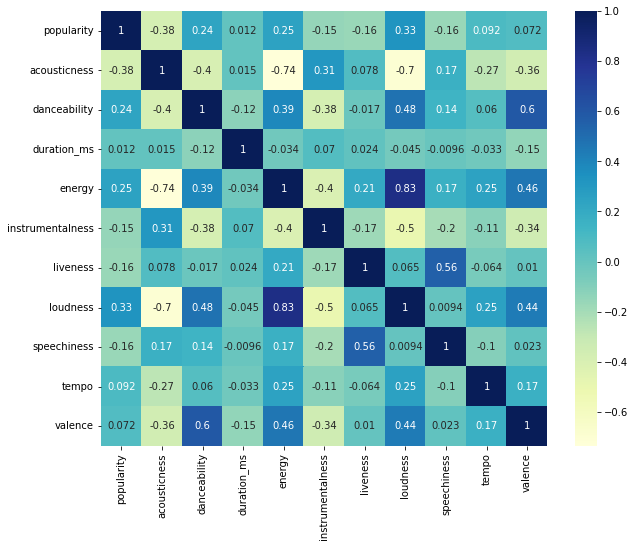

In [ ]:
# 각 특성간의 관계성
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
# RdYlGn_r, RdYlBu, YlGnBu

In [ ]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = ['genre']
X = df[features]
y = df[target]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

# 다층 퍼셉트론 딥러닝
음악의 특성들을 통한 장르 예측

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(27, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/50
2973/2973 [==============================] - 11s 3ms/step - loss: 2.0022 - accuracy: 0.3721 - val_loss: 1.7248 - val_accuracy: 0.4583
Epoch 2/50
2973/2973 [==============================] - 9s 3ms/step - loss: 1.8082 - accuracy: 0.4291 - val_loss: 1.6671 - val_accuracy: 0.4668
Epoch 3/50
2973/2973 [==============================] - 8s 3ms/step - loss: 1.7614 - accuracy: 0.4428 - val_loss: 1.6384 - val_accuracy: 0.4761
Epoch 4/50
2973/2973 [==============================] - 8s 3ms/step - loss: 1.7377 - accuracy: 0.4494 - val_loss: 1.6241 - val_accuracy: 0.4774
Epoch 5/50
2973/2973 [==============================] - 8s 3ms/step - loss: 1.7233 - accuracy: 0.4539 - val_loss: 1.6143 - val_accuracy: 0.4816
Epoch 6/50
2973/2973 [==============================] - 8s 3ms/step - loss: 1.7146 - accuracy: 0.4566 - val_loss: 1.6023 - val_accuracy: 0.4835
Epoch 7/50
2973/2973 [==============================] - 9s 3ms/step - loss: 1.7024 - accuracy: 0.4592 - val_loss: 1.5928 - val_accuracy

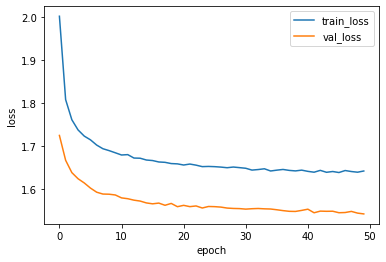

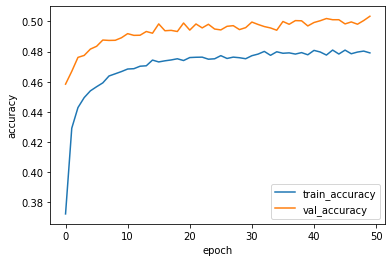

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

929/929 - 1s - loss: 1.5394 - accuracy: 0.5104 - 1s/epoch - 1ms/step


[1.5394104719161987, 0.5104128122329712]

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 27)               

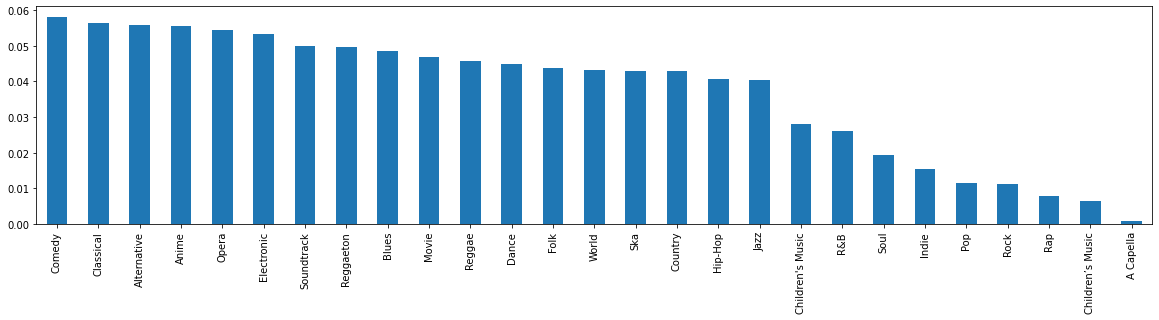

In [ ]:
df['genre'].value_counts(normalize=True).plot(kind='bar', figsize=(20, 4))

In [ ]:
A = pd.DataFrame(pd.DataFrame(y).value_counts())
A = [i[0] for i in A.index]
B = pd.DataFrame(df['genre'].value_counts(normalize=True))
B['label'] = A
B

,genre,label
Comedy,0.058137,7
Classical,0.056488,6
Alternative,0.055883,1
Anime,0.055566,2
Opera,0.054476,16
Electronic,0.053258,10
Soundtrack,0.049941,25
Reggaeton,0.049571,21
Blues,0.048555,3
Movie,0.046745,15


In [ ]:
import numpy as np
# 장르와 라벨 
Label = {i : j for i, j in zip(A, B.index)}

def genre_pred(sample):
  
  D = {}
  for idx, i in enumerate(sample[0]):
    D[idx] = i

  return Label[sorted(D.items(), key = lambda item: item[1], reverse=True)[0][0]]
    

# Grid Search 하이퍼파라미터 조정(시간 오래걸림)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def DL_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(27, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
    return model

In [ ]:
model = KerasClassifier(build_fn=DL_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
batch_size = [32, 64, 128]
epochs = [20, 40, 60]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# HyperOpt

베이지안 최적화의 접근 방식을 취하는 HyperOpt

In [ ]:
!pip install hyperas

In [ ]:
import numpy as np

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform

def data():
  df= pd.read_csv("/content/SpotifyFeatures.csv")
  df = df.drop("track_id", axis = 1)
  df = df.drop_duplicates(['track_name'])
  df = df.reset_index()
  df.drop('index',axis=1,inplace=True)

  features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
  target = ['genre']
  X = df[features]
  y = df[target]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  le = LabelEncoder()
  y = le.fit_transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

  return X_train, y_train, X_test, y_test

def DL_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(512, input_shape=(10,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(27))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    result = model.fit(X_train, y_train,
              batch_size={{choice([64, 128, 256, 512])}},
              epochs={{choice([15, 30, 50])}},
              verbose=2,
              validation_split=0.2)
    
    validation_acc = model.evaluate(X_val, y_val, verbose=2)
    print('Best validation acc of epoch:', validation_acc[1])
    return {'loss': validation_acc[0], 'status': STATUS_OK, 'model': model}

if __name__ == '__main__':
  trials = Trials()
  best_run, best_model = optim.minimize(model=DL_model,
                            data=data,
                            algo=tpe.suggest,
                            max_evals=5,
                            trials=trials,
                            notebook_name='genre_model')

  X_train, y_train, X_test, y_test = data()
  print()
  print("==============================RESULT=====================================")
  print("Evalutation of best performing model:")
  print(best_model.evaluate(X_test, y_test))
  print("Best performing model chosen hyper-parameters:")
  print(best_run)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import pandas as pd
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler
except:
    pass

try:
    from sklearn.preprocessing import LabelEncoder
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Dense
except:
    pass

try:
    fr

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/30
1189/1189 - 25s - loss: 2.8731 - accuracy: 0.1584 - val_loss: 2.4147 - val_accuracy: 0.3407 - 25s/epoch - 21ms/step

Epoch 2/30
1189/1189 - 25s - loss: 2.4071 - accuracy: 0.2665 - val_loss: 2.0807 - val_accuracy: 0.3759 - 25s/epoch - 21ms/step

Epoch 3/30
1189/1189 - 17s - loss: 2.2106 - accuracy: 0.3152 - val_loss: 1.9582 - val_accuracy: 0.3963 - 17s/epoch - 14ms/step

Epoch 4/30
1189/1189 - 15s - loss: 2.1079 - accuracy: 0.3447 - val_loss: 1.8933 - val_accuracy: 0.4128 - 15s/epoch - 13ms/step

Epoch 5/30
1189/1189 - 15s - loss: 2.0463 - accuracy: 0.3612 - val_loss: 1.8557 - val_accuracy: 0.4235 - 15s/epoch - 12ms/step

Epoch 6/30
1189/1189 - 15s - loss: 2.0117 - accuracy: 0.3741 - val_loss: 1.8265 - val_accuracy: 0.4315 - 15s/epoch - 13ms/step

Epoch 7/30
1189/1189 - 15s - loss: 1.9805 - accuracy: 0.3809 - val_loss: 1.8087 - val_accuracy: 0.4348 - 15s/epoch - 13ms/step

Epoch 8/30
1189/1189 - 16s - loss: 1.9563 - accuracy: 0.3891 - val_loss: 1.7951 - val_accuracy: 0.4389 -

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


929/929 [==============================] - 3s 4ms/step - loss: 1.4797 - accuracy: 0.5240
[1.4796785116195679, 0.5239713191986084]
Best performing model chosen hyper-parameters:
{'Dropout': 0.14514364721165218, 'Dropout_1': 0.47268542196596874, 'Dropout_2': 0.7275581656084844, 'batch_size': 2, 'epochs': 2, 'optimizer': 1}


# 베이지안 최적화

In [ ]:
!pip install Bayesian-Optimization

In [ ]:
def bayes(epochs, batch_size, learning_rate):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(512, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(27, activation='softmax')
      ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')
  
  model.fit(X_train, y_train,
                 epochs=epochs,
                 batch_size = batch_size,
                 validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=3)])
  
  acc = model.evaluate(X_test, y_test, verbose=1)
  return acc

In [ ]:
pbounds = {'eopchs' : (10, 50),
           'batch_size' : (64, 256),
           'learning_rate' : (0.00001, 0.001)}

bo=BayesianOptimization(f=bayes, pbounds=pbounds, verbose=2, random_state=1) 

bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

print(bo.max)

# 음악 추천(코사인 유사도 활용)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


# 비슷한 4곡 추천
def recommend(sample):
  simmillar_list = []
  
  for i, j in enumerate(df[features].values):
    simmillar_list.append([cosine_similarity([sample], [list(j)]), i])
    
  simmillar_list.sort()

  recommend_list = []
  for i in range(4):
    recommend_list.append([df['track_name'][simmillar_list[-i-1][1]], df['artist_name'][simmillar_list[-i-1][1]]])
  
  return recommend_list[0][0], recommend_list[0][1], recommend_list[1][0], recommend_list[1][1], recommend_list[2][0], recommend_list[2][1], recommend_list[3][0], recommend_list[3][1]